In [1]:
from collections import defaultdict
import math
import numpy as np
from numpy import ma
import datetime, time
from datetime import datetime
import netCDF4
from netCDF4 import Dataset, num2date
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline

import os
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from scipy.spatial import Delaunay
import pickle

import RODFF
import RODFF.Mesh_maker as Mesh_maker
import RODFF.Calc_path as Calc_path
import RODFF.Functions as Functions

# package(s) related to time, space and id
import datetime, time
import platform

# you need these dependencies (you can get these from anaconda)
# package(s) related to the simulation
import simpy

# spatial libraries 
import shapely.geometry
from simplekml import Kml, Style

# package(s) for data handling
import numpy as np

# digital twin package
import digital_twin.core as core
import digital_twin.model as model
import digital_twin.plot as plot

timeQ = time

In [2]:
name_textfile_load = 'test'

with open(name_textfile_load, 'rb') as input:
    Roadmap = pickle.load(input)

In [8]:
t0 = '08/05/2018 02:00:00'
start = (52.977946, 4.758042)
stop = (53.331927, 5.125379)

vmax = 5

In [9]:
vvmax = Roadmap.vship[:,-1]

vv= np.abs(vvmax - vmax)
arg_vship = int(np.argwhere(vv == vv.min())[0])
class graph_functions_time:
    function_type = "time optimalisation"
    weights = Roadmap.weight_time[arg_vship].weights
    time = Roadmap.weight_time[arg_vship].weights
    vship = Roadmap.vship[arg_vship]
    graph = Roadmap.graphs[arg_vship]

route = Calc_path.Has_route(start, stop, Roadmap, t0, graph_functions_time)

path2 = np.array(route.route[:,0], dtype=int)
path = np.zeros((len(route.route[:,0]),2))
path[:,0] = Roadmap.nodes[path2][:,1]
path[:,1] = Roadmap.nodes[path2][:,0]

time = route.route[:,1]

dist = []
D = 0
for i in range(route.route[:,0].shape[0] -1 ):
        D =D + Mesh_maker.haversine((route.y_route[i], route.x_route[i]), (route.y_route[i +1], route.x_route[i+1]))
        dist.append(D)
dist = np.array(dist)

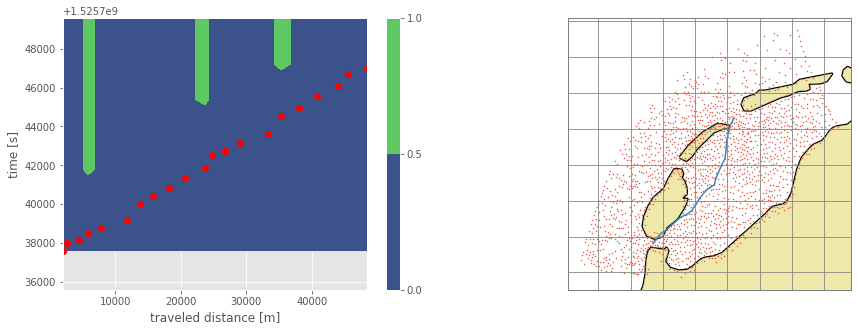

In [10]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(1,2,1)

RODFF.plot_timeseries(route,Roadmap)

ax = plt.subplot(1,2,2, projection=ccrs.Mercator())
ax.coastlines(resolution='10m', color='black', linewidth=3)
ax.gridlines(color = 'grey', zorder = 3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='palegoldenrod'))
plt.plot(Roadmap.nodes[:,1],Roadmap.nodes[:,0],'.', markersize = 1, transform=ccrs.PlateCarree())
plt.plot(path[:,0], path[:,1], transform=ccrs.PlateCarree())

plt.show()

In [13]:
700_000/7/24

4166.666666666667

In [16]:
7**3

343